In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot 
%matplotlib inline

## Data Cleaning

In [2]:
data=pd.read_csv("Top_Women_Chessplayer.csv")

#--------Filling NA with 0-----------------#

data["Year_of_birth"]=data["Year_of_birth"].fillna(0)
data["Title"]=data["Title"].fillna(0)
data["Rapid_rating"]=data["Rapid_rating"].fillna(0)
data["Blitz_rating"]=data["Blitz_rating"].fillna(0)
data["Inactive_flag"]=data["Inactive_flag"].fillna(0)

#-----------Replacing values-----------------#

title_replacement={"GM":"Grandmaster",
                   "IM":"International Master",
                   "FM": "FIDE Master",
                   "CM": "Candidate Master",
                   "WFM": "Woman FIDE master",
                   "WCM": "Woman Candidate Master", }

data["Title"].replace(title_replacement, inplace=True)
data["Gender"].replace({"F":"Female"}, inplace=True)
data["Inactive_flag"].replace({"wi":"Woman Inactive"}, inplace=True)

#-----------From float to Int-----------------#


data["Year_of_birth"]=data["Year_of_birth"].astype(np.int64)
data["Standard_Rating"]=data["Standard_Rating"].astype(np.int64)
data["Rapid_rating"]=data["Rapid_rating"].astype(np.int64)
data["Blitz_rating"]=data["Blitz_rating"].astype(np.int64)

#-----------Finding out the country for Alpha3 Code-----------------#

url="https://www.iban.com/country-codes"
dfl=pd.read_html(url,header=0)[0]
data=pd.merge(data,dfl, left_on="Federation", right_on="Alpha-3 code")
data.drop(["Alpha-2 code", "Alpha-3 code", "Numeric"], axis=1)


#-----------Reorganizing columns-----------------#


columns_name=["Fide id", "Name", "Federation", "Country", "Gender", "Year_of_birth", "Title", "Standard_Rating", "Rapid_rating", "Blitz_rating", "Inactive_flag"]
data=data.reindex(columns=columns_name)

data

/anaconda3/lib/python3.6/site-packages/bs4/element.py:16: UserWarning: The soupsieve package is not installed. CSS selectors cannot be used.
  'The soupsieve package is not installed. CSS selectors cannot be used.'


,Fide id,Name,Federation,Country,Gender,Year_of_birth,Title,Standard_Rating,Rapid_rating,Blitz_rating,Inactive_flag
0,700070,"Polgar, Judit",HUN,Hungary,Female,1976,Grandmaster,2675,2646,2736,Woman Inactive
1,700088,"Polgar, Susan",HUN,Hungary,Female,1969,Grandmaster,2577,0,0,Woman Inactive
2,700231,"Polgar, Sofia",HUN,Hungary,Female,1974,International Master,2450,0,0,Woman Inactive
3,12400149,"Hoang, Thanh Trang",HUN,Hungary,Female,1980,Grandmaster,2407,2338,2364,0
4,717444,"Gara, Ticia",HUN,Hungary,Female,1984,WGM,2371,2274,2340,0
...,...,...,...,...,...,...,...,...,...,...,...
6570,5600103,"Sciortino, Marilyn",MLT,Malta,Female,1960,0,1828,0,0,Woman Inactive
6571,8201390,"Kaslan, Catherine",SUR,Suriname,Female,2003,Woman FIDE master,1872,1856,1624,0
6572,8200149,"Naipal, Victoria",SUR,Suriname,Female,1989,Woman FIDE master,1835,0,0,Woman Inactive
6573,10000291,"Amoko, Ivy Claire",UGA,Uganda,Female,1987,Woman FIDE master,1862,0,1812,0


In [3]:
data.dtypes

Fide id             int64
Name               object
Federation         object
Country            object
Gender             object
Year_of_birth       int64
Title              object
Standard_Rating     int64
Rapid_rating        int64
Blitz_rating        int64
Inactive_flag      object
dtype: object

In [4]:
#pd.options.display.float_format = '{:.2f}%'.format

def missing_values(n):
    df=pd.DataFrame()
    df["missing, %"]=data.isnull().sum()*100/len(data.isnull())                           
    df["missing, num"]=data.isnull().sum()
    return df.sort_values(by="missing, %", ascending=False)
missing_values(data)



,"missing, %","missing, num"
Fide id,0.0,0
Name,0.0,0
Federation,0.0,0
Country,0.0,0
Gender,0.0,0
Year_of_birth,0.0,0
Title,0.0,0
Standard_Rating,0.0,0
Rapid_rating,0.0,0
Blitz_rating,0.0,0


## Statistics

In [5]:
data.corr().style.background_gradient()

,Fide id,Year_of_birth,Standard_Rating,Rapid_rating,Blitz_rating
Fide id,1.000000,0.063098,-0.101923,0.205628,0.183026
Year_of_birth,0.063098,1.000000,-0.043683,0.151683,0.148772
Standard_Rating,-0.101923,-0.043683,1.000000,0.112011,0.141750
Rapid_rating,0.205628,0.151683,0.112011,1.000000,0.703485
Blitz_rating,0.183026,0.148772,0.141750,0.703485,1.000000


<AxesSubplot:>

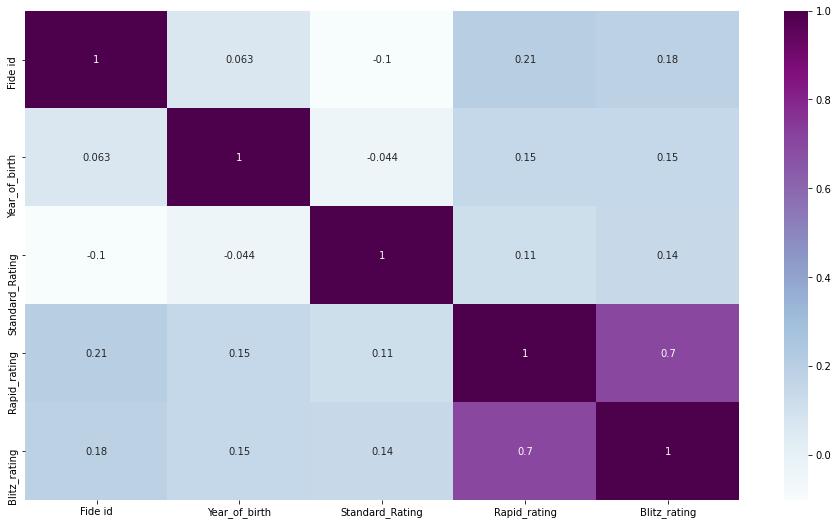

In [6]:
plt.rcParams["figure.figsize"]=[16,9]
sns.heatmap(data.corr(), annot=True, cmap="BuPu")

## Rapid Raining influences the Blitz Rating

<AxesSubplot:xlabel='Rapid_rating', ylabel='Blitz_rating'>

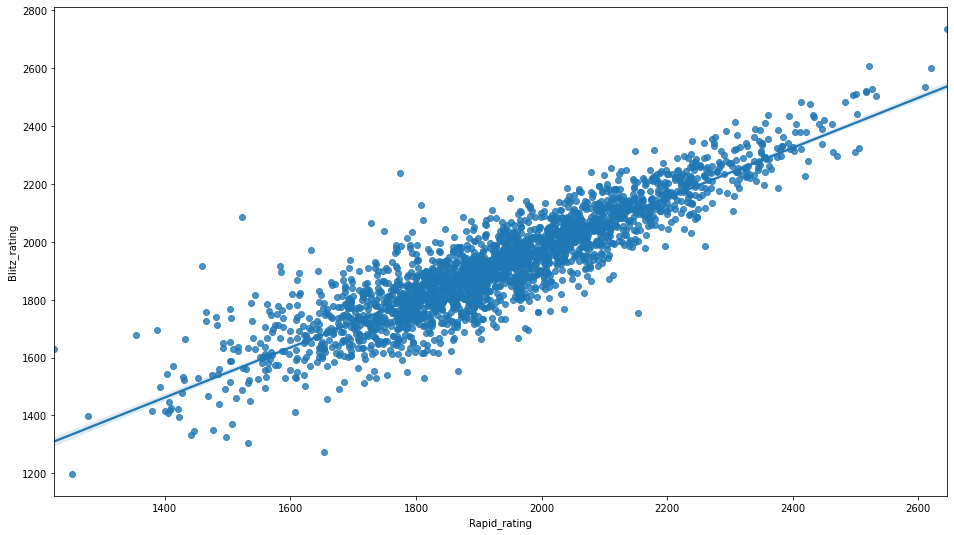

In [7]:
mask=(data["Rapid_rating"]!=0) & (data["Blitz_rating"]!=0)
sns.regplot(data=data[mask], x="Rapid_rating", y="Blitz_rating")


Those who had higher rapid rating, had also higher blitz rating

## Who got the highest rating (general, rapid, blitz)?

In [8]:
(data
 .groupby("Name")
 [["Standard_Rating", "Rapid_rating", "Blitz_rating"]]
 .max()
 .sort_values(by=["Standard_Rating", "Rapid_rating", "Blitz_rating"], ascending=False)
)

,Standard_Rating,Rapid_rating,Blitz_rating
Name,,,
"Polgar, Judit",2675,2646,2736
"Hou, Yifan",2658,2621,2601
"Koneru, Humpy",2586,2483,2483
"Goryachkina, Aleksandra",2582,2502,2441
"Polgar, Susan",2577,0,0
...,...,...,...
"Alaa El Din, Yosra",1801,0,0
"Grigoryan, Arshaluys",1801,0,0
"Morales Checa, Karla",1801,0,0


Polgar Judir, Hou Yifan, and Koneru Humpy has been in the top rating for standard, rapid and blitz chess plays


## How many countries and chess players?

In [9]:
data["Country"].value_counts()

Russian Federation (the)    1698
Poland                       384
Ukraine                      287
India                        284
Spain                        251
                            ... 
Cabo Verde                     1
Namibia                        1
Panama                         1
Uganda                         1
Macao                          1
Name: Country, Length: 74, dtype: int64

74 countries in this database. Most of the chess players are from Russia

In [106]:
data["Name"].value_counts()

Kuznetsova, Olga                  3
Kovaleva, Ekaterina               2
Smirnova, Ekaterina               2
Fedorova, Anna                    2
Kovalenko, Yulya                  2
                                 ..
Kim, Tatiana                      1
Sarkisian, Marina                 1
Arruebarrena Barrueta, Yasleny    1
Efimova, Olga A.                  1
Puuska, Heini                     1
Name: Name, Length: 6555, dtype: int64

There are 6555 women chess players

## Who is the oldest chessplayer

In [134]:
data[data["Year_of_birth"]!=0][["Name", "Year_of_birth", "Title", "Country"]].sort_values(by="Year_of_birth", ascending=True)


,Name,Year_of_birth,Title,Country
3646,"Donnelly, Ruth",1920,0,United States of America (the)
4566,"Eretova, Kveta",1926,WGM,Czechia
3805,"Rybarska, Janina",1926,0,Poland
1619,"Kravchenko, Klara",1926,0,Russian Federation (the)
5775,"Duer, Maria",1927,0,Austria
...,...,...,...,...
3674,"Lee, Alice",2009,Woman Candidate Master,United States of America (the)
3729,"Mou, Iris",2009,Woman Candidate Master,United States of America (the)
2351,"Svergina, Sofya",2009,Woman Candidate Master,Russian Federation (the)
3688,"Li, Rachael",2010,Woman Candidate Master,United States of America (the)


The oldest chessplayers are Donnelly Ruth (USA), Eretove Kveta(Czechia), Rybarska Janina(Poland) and Kranchenko Klara(Russia). Their titles are not known, except the one for Eretova, but this title does not exist anymore

## Who is the youngest chess player?

In [135]:
data[data["Year_of_birth"]!=0][["Name", "Year_of_birth", "Title", "Country"]].sort_values(by="Year_of_birth", ascending=False)

,Name,Year_of_birth,Title,Country
256,"Lu, Miaoyi",2010,0,China
3688,"Li, Rachael",2010,Woman Candidate Master,United States of America (the)
4996,"Khamdamova, Afruza",2009,Woman Candidate Master,Uzbekistan
2947,"Nurgaliyeva, Zarina",2009,Woman Candidate Master,Kazakhstan
3674,"Lee, Alice",2009,Woman Candidate Master,United States of America (the)
...,...,...,...,...
5775,"Duer, Maria",1927,0,Austria
3805,"Rybarska, Janina",1926,0,Poland
4566,"Eretova, Kveta",1926,WGM,Czechia
1619,"Kravchenko, Klara",1926,0,Russian Federation (the)


The youngest chessplayers are Lu Miaoyi from China, Li Rachael from USA , Khamdamova Afruze from Uzbekistan, and Nurganilieva Zarina from Kazakhstan . All of them except Lu have the title of the Woman Candidate Master

## titles & Ratings?

In [15]:
(data[data["Title"]!=0]
 .groupby("Title")
 [["Standard_Rating", "Rapid_rating", "Blitz_rating"]]
 .mean()
 .sort_values(by="Standard_Rating", ascending=False)
)

,Standard_Rating,Rapid_rating,Blitz_rating
Title,,,
Grandmaster,2490.147059,2232.882353,2215.088235
International Master,2352.551020,1989.020408,1886.744898
WGM,2248.662698,1554.345238,1545.257937
FIDE Master,2182.761905,1597.714286,1757.428571
WIM,2141.867330,1168.946932,1181.636816
Woman FIDE master,2057.982573,984.349378,1018.990871
Candidate Master,2004.571429,1327.857143,1288.142857
Woman Candidate Master,1926.010929,1024.005464,1136.683060


For Grandmaster chessplayers must have on average the highest standard rating, For International Master and WGM aroudn 2200-2300 and the least mean rating is for Woman Candidate Master

## Age and Standard Rating

In [35]:
(data[data["Year_of_birth"]!=0]
 .groupby("Year_of_birth")
 [["Standard_Rating"]]
 .mean()
 .sort_values(by="Standard_Rating", ascending=True)
 .head(10)
)


,Standard_Rating
Year_of_birth,
1930,1832.000000
2009,1857.000000
2008,1902.750000
2006,1918.057143
2007,1928.043478
1942,1931.625000
1927,1950.500000
1990,1960.976378
1997,1961.772487


The lowest rating do have chessplayers from 1930, 2009, 2007 and 2006 years

In [36]:
(data[data["Year_of_birth"]!=0]
 .groupby("Year_of_birth")
 [["Standard_Rating"]]
 .mean()
 .sort_values(by="Standard_Rating", ascending=False)
 .head(10)
)


,Standard_Rating
Year_of_birth,
1932,2120.000000
1937,2099.333333
1976,2096.487805
1933,2095.000000
2010,2091.500000
1969,2088.660377
1973,2084.698413
1944,2084.000000
1954,2083.235294


The highest rating was for chess players from 1932, 1937 and 1976

## Conclusion:
    - Those who had higher rapid rating, had also higher blitz rating
    - Polgar Judir, Hou Yifan, and Koneru Humpy has been in the top rating for standard, rapid and blitz chess plays
    - 74 Countries and 6555 women
    - The oldest chessplayers are Donnelly Ruth (USA), Eretove Kveta(Czechia), Rybarska Janina(Poland) and Kranchenko Klara(Russia). Their titles are not known, except the one for Eretova, but this title does not exist anymore
    - The youngest chessplayers are Lu Miaoyi from China, Li Rachael from USA , Khamdamova Afruze from Uzbekistan, and Nurganilieva Zarina from Kazakhstan . All of them except Lu have the title of the Woman Candidate Master
    - For Grandmaster chessplayers must have on average the highest standard rating, For International Master and WGM aroudn 2200-2300 and the least mean rating is for Woman Candidate Master
    - The lowest rating do have chessplayers from 1930, 2009, 2007 and 2006 years
    - The highest rating was for chess players from 1932, 1937 and 1976
    